<a href="https://colab.research.google.com/github/Daniel-Wait/SKRIPSIE_workbooks/blob/master/SKRIPSIE_fsk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
DB WAIT
20887507

"""
%matplotlib inline
%load_ext autoreload
%autoreload 2
import math
import numpy as np
from matplotlib import pylab as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Import different modules for using with the notebook
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

#A helper-function to setup a proper plot
def setup_plot(title, y_label='', x_label='', newfig=True):
  if newfig:
    plt.figure()
  plt.margins(*(plt.array(plt.margins())+0.05))
  plt.title(title)
  plt.ylabel(y_label)
  plt.xlabel(x_label)

#A helper-function to setup a proper plot
def fsk(bitseq, spb, f0, f1, fs):
  Ts = 1/fs  
  nb = bitseq.shape[0]
  num = np.array(range(0, spb))
  mn = np.zeros(shape = (spb*nb,), dtype = np.float32)
  mn_len = np.array(range(0, mn.shape[0]))
  
  for i in range(0, nb):
    if (bitseq[i] == 1): 
      bit = np.sin(2*f1*np.pi*num*Ts)
    if (bitseq[i] == 0):
      bit = np.sin(2*f0*np.pi*num*Ts)
    mn[i*spb:(i+1)*spb] = bit

  setup_plot("Modulated Signal")
  plt.plot(mn, 'c')
  plt.stem(mn, use_line_collection=True, markerfmt= 'r.', linefmt = 'r:')
  plt.show()
  
  return mn

def pollute(bitseq, len, spb, f0, f1, fs, gain, timeshift, noise_stddev):
  Ts = 1/fs  
  nb = bitseq.shape[0]
  num = np.array(range(0, spb)) 
  rn = np.zeros(shape = (spb*nb,), dtype = np.float32)
  phase1 = 2*np.pi*f1*timeshift
  phase0 = 2*np.pi*f0*timeshift

  for i in range(0, nb):
    if (bitseq[i] == 1): 
      bit = np.sin(2*f1*np.pi*num*Ts + phase1)
    if (bitseq[i] == 0):
      bit = np.sin(2*f0*np.pi*num*Ts + phase0)
    rn[i*spb:(i+1)*spb] = bit
  
  rn = np.insert(rn, 0, np.zeros(shape = (len,)) )
  rn = np.append(rn, np.zeros(shape = (len,)) )
  wn = np.random.normal(loc=0.0, scale=noise_stddev, size=(nb*spb + 2*len,))
  rn = gain*rn + wn

  setup_plot("Received Signal")
  plt.plot(rn, 'm')
  #plt.stem(rn, use_line_collection=True, markerfmt= 'g.', linefmt = 'g:')
  plt.show()
  
  return rn

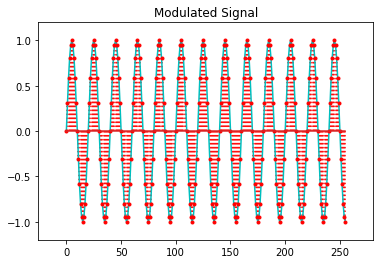

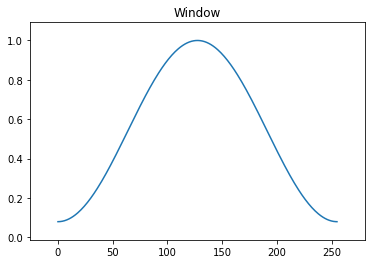

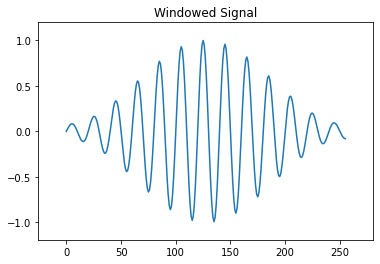

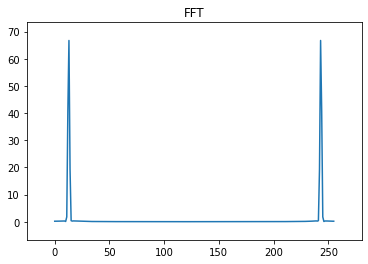

0.05418903165700149
0.054189031657001833


In [ ]:
input = np.array([1])

tx = fsk(bitseq = input, spb = 256, f0 = 4000, f1 = 2205, fs = 44100)

win = np.hamming(256)
setup_plot("Window")
#plt.stem(win, use_line_collection=True, markerfmt= 'g.', linefmt = 'g:')
plt.plot(win)
plt.show()

tx =tx*win
setup_plot("Windowed Signal")
#plt.stem(tx, use_line_collection=True, markerfmt= 'b.', linefmt = 'b:')
plt.plot(tx)
plt.show()

tf = np.abs(np.fft.fft(tx))
setup_plot("FFT")
plt.plot(tf)
plt.show()

print(tf[58])

print(tf[198])

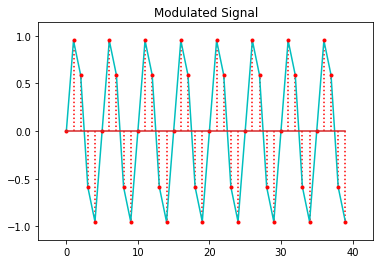

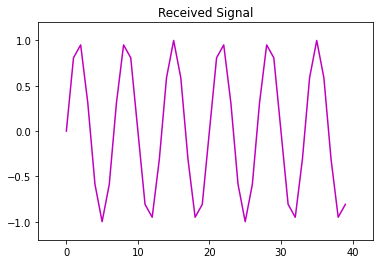

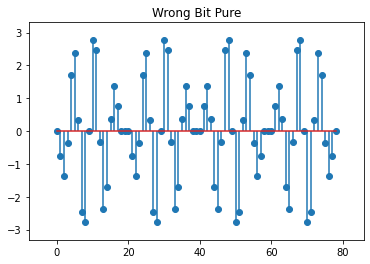

In [ ]:
bit1 = np.array([1])
bit0 = np.array([0])

tx = fsk(bitseq = bit1, spb = 40, f0 = 6615, f1 = 8820, fs = 44100)

rx = pollute(bitseq=bit0, len=0, spb = 40, f0 = 6615, f1 = 8820, fs = 44100, gain = 1, timeshift = 0, noise_stddev = 0)

rtr = np.correlate(rx, tx, mode = "full")

setup_plot("Wrong Bit Pure")
plt.stem(rtr, use_line_collection = True)
plt.show()

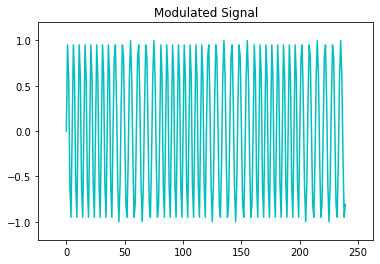

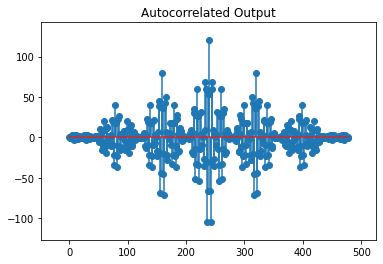

In [ ]:
#AUTOCORRELATION

bits = np.array([1,0,1,0,1,0])

tx = fsk(bitseq = bits, spb = 40, f0 = 6615, f1 = 8820, fs = 44100)

rtt = np.correlate(tx, tx, mode = "full")

setup_plot("Autocorrelated Output")
plt.stem(rtt, use_line_collection = True)
plt.show()

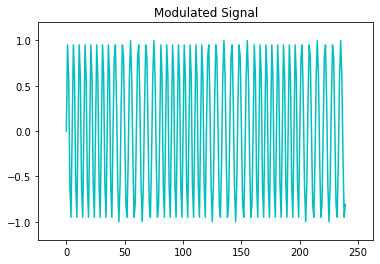

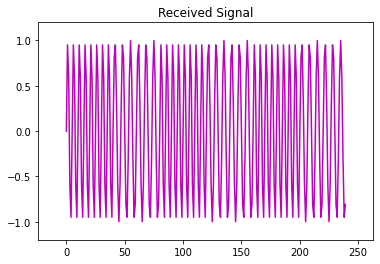

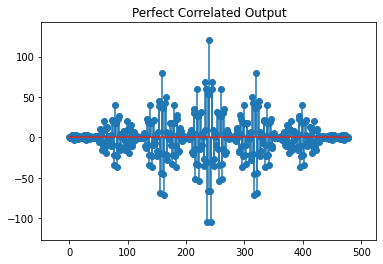

In [ ]:
#PERFECT RECEPTION

bits = np.array([1,0,1,0,1,0])

tx = fsk(bitseq = bits, spb = 40, f0 = 6615, f1 = 8820, fs = 44100)

rx = pollute(bitseq=bits, len=0, spb = 40, f0 = 6615, f1 = 8820, fs = 44100, gain = 1, timeshift = 0, noise_stddev = 0)

rtr = np.correlate(rx, tx, mode = "full")

setup_plot("Perfect Correlated Output")
plt.stem(rtr, use_line_collection = True)
plt.show()

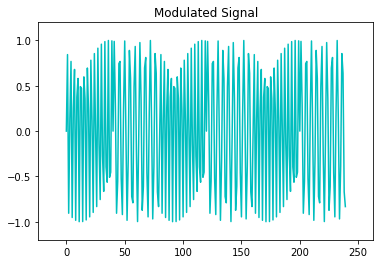

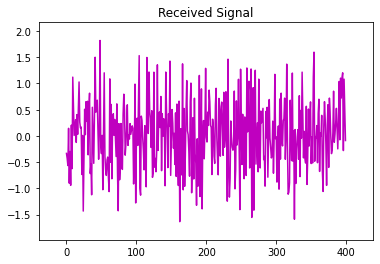

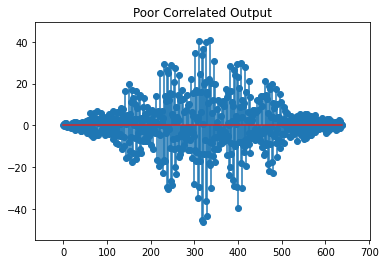

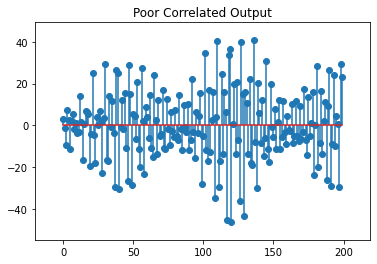

In [ ]:
#POOR RECEPTION

bits = np.array([1,0,1,0,1,0])

tx = fsk(bitseq = bits, spb = 40, f0 = 10000, f1 = 15000, fs = 44100)

rx = pollute(bitseq=bits, len=80, spb = 40, f0 = 10000, f1 = 15000, fs = 44100, gain = 0.5, timeshift = 1/(2*44100), noise_stddev = 0.6)

rtr = np.correlate(rx, tx, mode = "full")

setup_plot("Poor Correlated Output")
plt.stem(rtr, use_line_collection = True)
plt.show()

setup_plot("Poor Correlated Output")
plt.stem(rtr[200:400], use_line_collection = True)
plt.show()


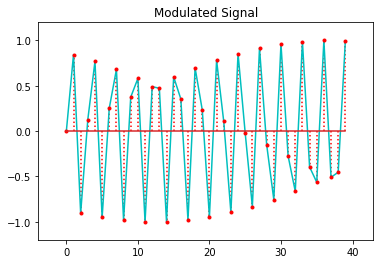

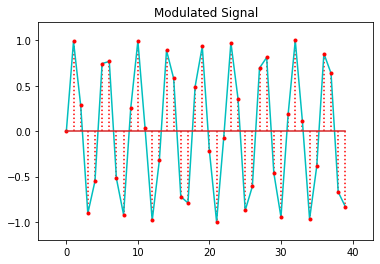

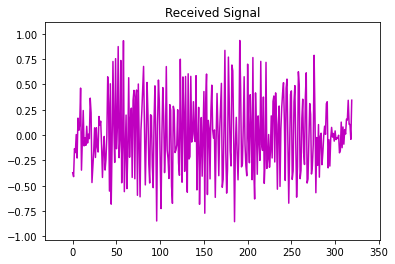

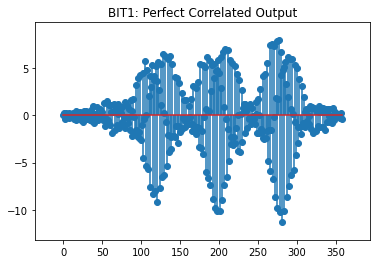

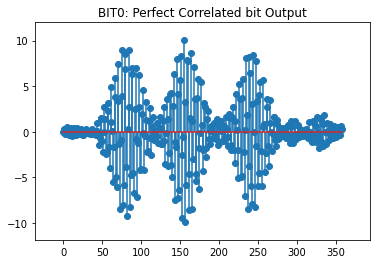

In [ ]:
#Individual BITS

bits = np.array([1,0,1,0,1,0])

b1 = fsk(bitseq = np.array([1]), spb = 40, f0 = 10000, f1 = 15000, fs = 44100)
b0 = fsk(bitseq = np.array([0]), spb = 40, f0 = 10000, f1 = 15000, fs = 44100)

rx = pollute(bitseq = bits, len=40, spb = 40, f0 = 10000, f1 = 15000, fs = 44100, gain = 0.5, timeshift = 1/(2*44100), noise_stddev = 0.2)

rr1 = np.correlate(b1, rx, mode = "full")
rr0 = np.correlate(b0, rx, mode = "full")

setup_plot("BIT1: Perfect Correlated Output")
plt.stem(rr1, use_line_collection = True)
plt.show()

setup_plot("BIT0: Perfect Correlated bit Output")
plt.stem(rr0, use_line_collection = True)
plt.show()

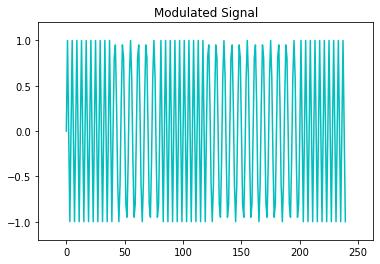

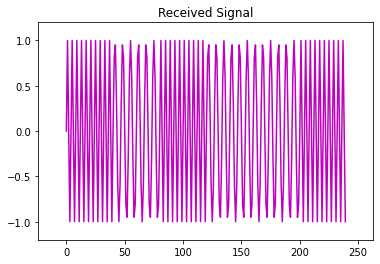

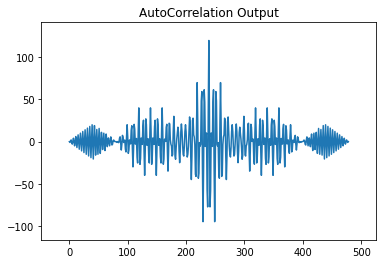

0.0
20.0
3.5762787e-07
40.0
40.0
20.0
120.0
20.0


In [ ]:
bits  = np.array([1,0,1,0,0,1])
tx = fsk(bitseq = bits, spb = 40, f0 = 6615, f1 = 11025, fs = 44100)
rx = pollute(bitseq=bits, len=0, spb = 40, f0 = 6615, f1 = 11025, fs = 44100, gain = 1, timeshift = 0, noise_stddev = 0)

rtt = np.correlate(tx, tx, mode = "full")

setup_plot("AutoCorrelation Output")
#plt.stem(rtt, use_line_collection = True, markerfmt = '')
plt.plot(rtt)
plt.show()


for i in range(0,8):
  print(rtt[40*i-1])

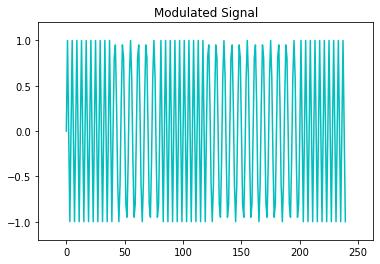

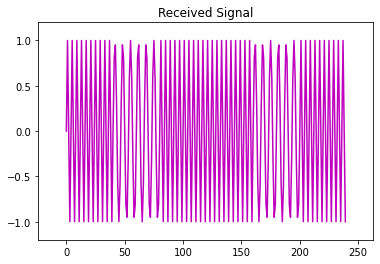

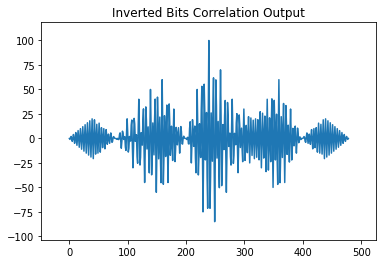

In [ ]:
bits1 = np.array([1,0,1,1,0,1])

tx = fsk(bitseq = bits, spb = 40, f0 = 6615, f1 = 11025, fs = 44100)

rx1 = pollute(bitseq=bits1, len=0, spb = 40, f0 = 6615, f1 = 11025, fs = 44100, gain = 1, timeshift = 0, noise_stddev = 0)

rtr1 = np.correlate(rx1, tx, mode = "full")

setup_plot("Inverted Bits Correlation Output")
#plt.stem(np.abs(rtr1), use_line_collection = True)
plt.plot(rtr1)
plt.show()

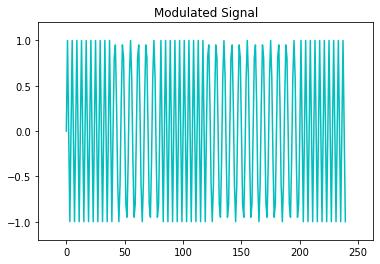

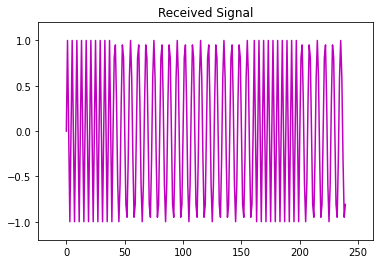

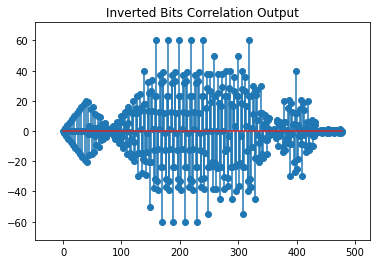

In [ ]:
bits2 = np.array([1,0,0,0,1,0])

tx = fsk(bitseq = bits, spb = 40, f0 = 6615, f1 = 11025, fs = 44100)

rx2 = pollute(bitseq = bits2, len=0, spb = 40, f0 = 6615, f1 = 11025, fs = 44100, gain = 1, timeshift = 0, noise_stddev = 0)

rtr2 = np.correlate(rx2, tx, mode = "full")

setup_plot("Inverted Bits Correlation Output")
plt.stem(rtr2, use_line_collection = True)
plt.show()

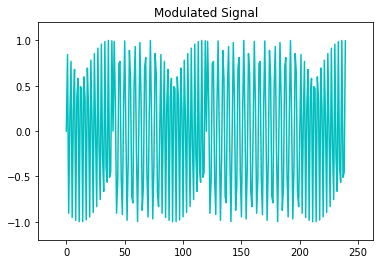

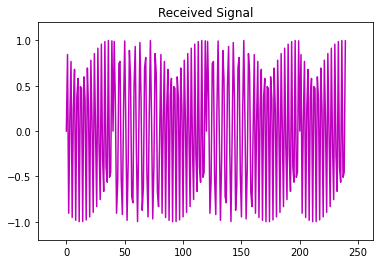

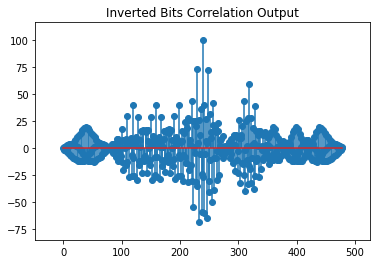

In [ ]:
bits3 = np.array([1,0,1,0,1,1])

tx = fsk(bitseq = bits, spb = 40, f0 = 10000, f1 = 15000, fs = 44100)

rx3 = pollute(bitseq = bits3, len=0, spb = 40, f0 = 10000, f1 = 15000, fs = 44100, gain = 1, timeshift = 0, noise_stddev = 0)

rtr3 = np.correlate(rx3, tx, mode = "full")

setup_plot("Inverted Bits Correlation Output")
plt.stem(rtr3, use_line_collection = True)
plt.show()

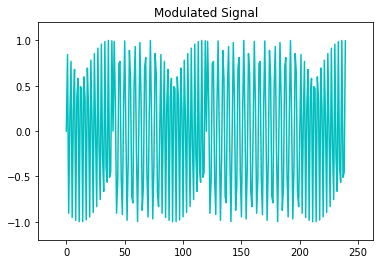

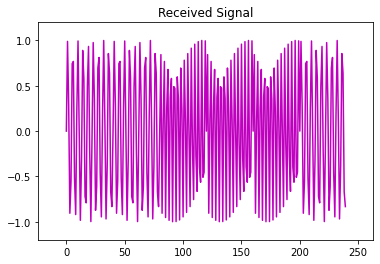

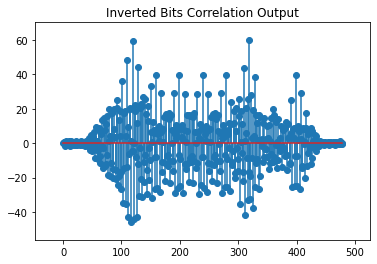

In [ ]:
bits4 = np.array([0,0,1,1,1,0])

tx = fsk(bitseq = bits, spb = 40, f0 = 10000, f1 = 15000, fs = 44100)

rx4 = pollute(bitseq = bits4, len=0, spb = 40, f0 = 10000, f1 = 15000, fs = 44100, gain = 1, timeshift = 0, noise_stddev = 0)

rtr4 = np.correlate(rx4, tx, mode = "full")

setup_plot("Inverted Bits Correlation Output")
plt.stem(rtr4, use_line_collection = True)
plt.show()

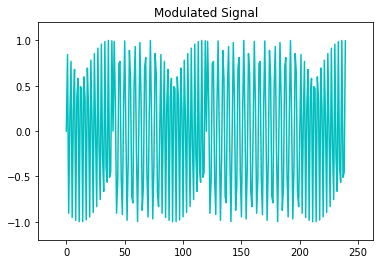

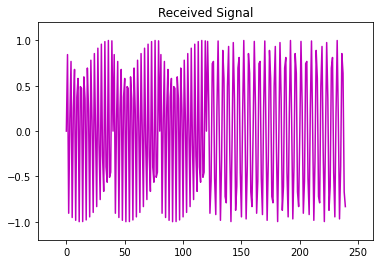

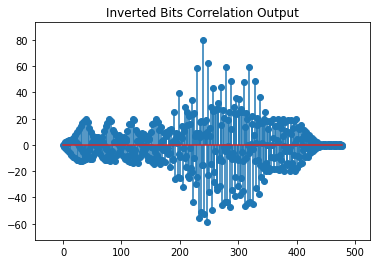

In [ ]:
bits5 = np.array([1,1,1,0,0,0])

tx = fsk(bitseq = bits, spb = 40, f0 = 10000, f1 = 15000, fs = 44100)

rx5 = pollute(bitseq = bits5, len=0, spb = 40, f0 = 10000, f1 = 15000, fs = 44100, gain = 1, timeshift = 0, noise_stddev = 0)

rtr5 = np.correlate(rx5, tx, mode = "full")

setup_plot("Inverted Bits Correlation Output")
plt.stem(rtr5, use_line_collection = True)
plt.show()

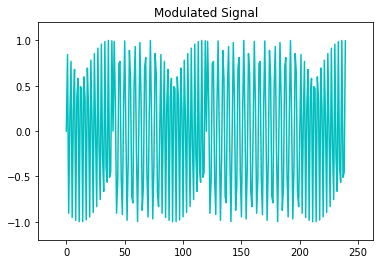

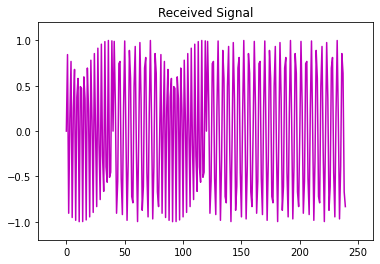

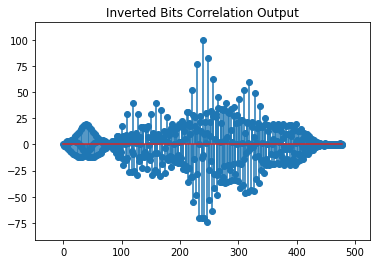

In [ ]:
bits6 = np.array([1,0,1,0,0,0])
tx = fsk(bitseq = bits, spb = 40, f0 = 10000, f1 = 15000, fs = 44100)

rx6 = pollute(bitseq = bits6, len=0, spb = 40, f0 = 10000, f1 = 15000, fs = 44100, gain = 1, timeshift = 0, noise_stddev = 0)

rtr6 = np.correlate(rx6, tx, mode = "full")

setup_plot("Inverted Bits Correlation Output")
plt.stem(rtr6, use_line_collection = True)
plt.show()

**CROSS-CORRELATION PATTERN**

_Symmetry check and Pattern difference_

Either reflect the signal around its max point. 

OR Compare with the normalized autocorrelation function.


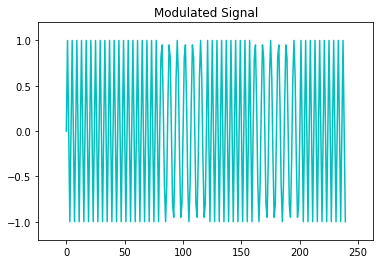

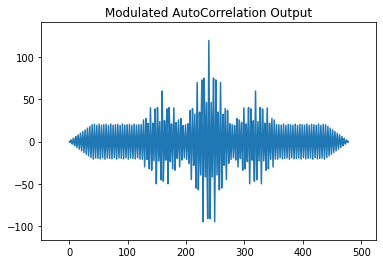

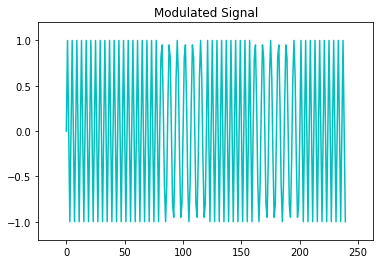

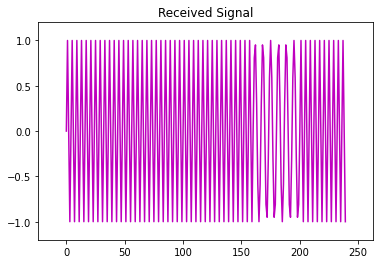

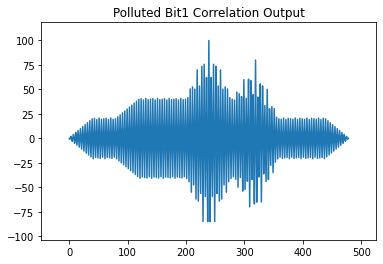

(479,)
(239,)
(239,)


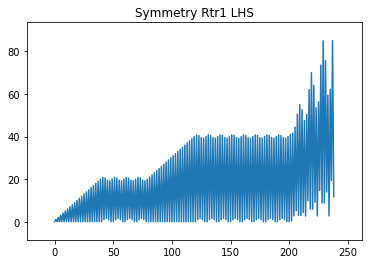

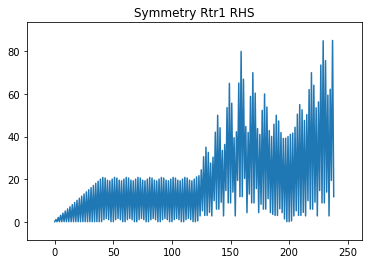

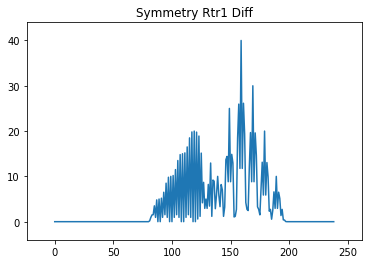

903.9171237348548


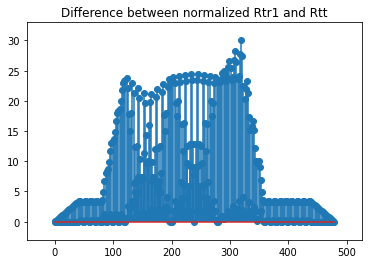

3146.957125219793


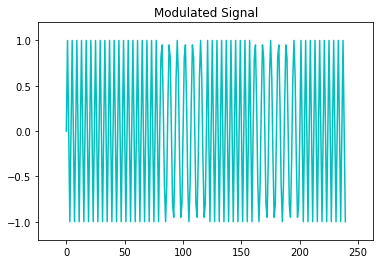

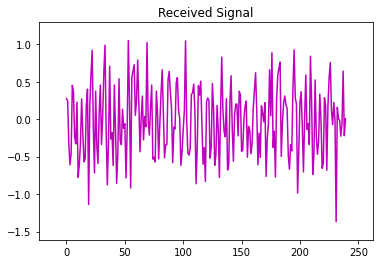

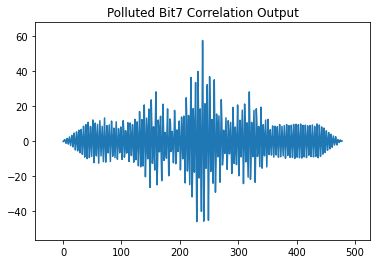

(479,)
(239,)
(239,)


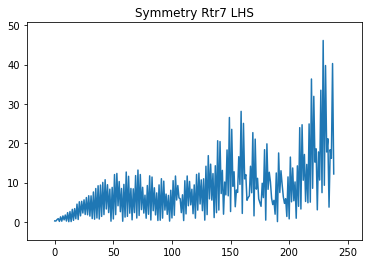

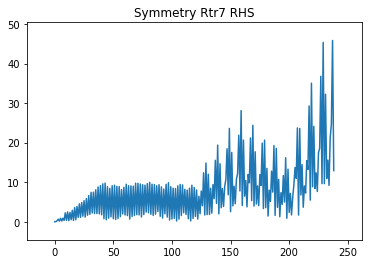

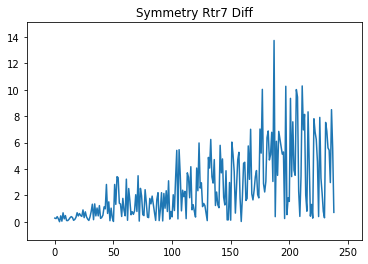

607.1172864994832


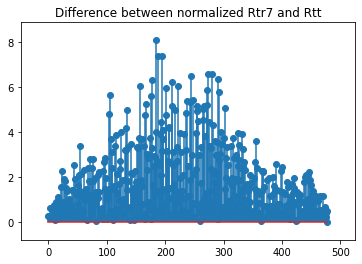

867.6198966993213


In [ ]:
bits  = np.array([1,1,0,1,0,1])

tx = fsk(bitseq = bits, spb = 40, f0 = 6615, f1 = 11025, fs = 44100)

rtt = np.correlate(tx, tx, mode = "full")
setup_plot("Modulated AutoCorrelation Output")
plt.plot(rtt)
plt.show()



#################################

bits1 = np.array([1,1,1,1,0,1])

tx = fsk(bitseq = bits, spb = 40, f0 = 6615, f1 = 11025, fs = 44100)

rx1 = pollute(bitseq=bits1, len=0, spb = 40, f0 = 6615, f1 = 11025, fs = 44100, gain = 1, timeshift = 0, noise_stddev = 0)

rtr1 = np.correlate(rx1, tx, mode = "full")


setup_plot("Polluted Bit1 Correlation Output")
plt.plot(rtr1)
plt.show()


a = np.abs(rtr1[0:239])
b = np.flip(np.abs(rtr1[240:480]))

print(rtr1.shape)
print(a.shape)
print(b.shape)

setup_plot("Symmetry Rtr1 LHS")
plt.plot(a)
plt.show()
setup_plot("Symmetry Rtr1 RHS")
plt.plot(b)
plt.show()
setup_plot("Symmetry Rtr1 Diff")
plt.plot(np.abs(a-b))
plt.show()

print(np.sum(np.abs(a-b)))


diff = np.abs(np.abs(rtt/1.2)-np.abs(rtr1))

setup_plot("Difference between normalized Rtr1 and Rtt")
plt.stem(diff, use_line_collection = True)
plt.show()

print(np.sum(diff))

#################################

bits7 = bits

tx = fsk(bitseq = bits, spb = 40, f0 = 6615, f1 = 11025, fs = 44100)

rx7 = pollute(bitseq=bits7, len=0, spb = 40, f0 = 6615, f1 = 11025, fs = 44100, gain = 0.5, timeshift = 0, noise_stddev = 0.3)

rtr7 = np.correlate(rx7, tx, mode = "full")

setup_plot("Polluted Bit7 Correlation Output")
plt.plot(rtr7)
plt.show()


a = np.abs(rtr7[0:239])
b = np.flip(np.abs(rtr7[240:480]))

print(rtr7.shape)
print(a.shape)
print(b.shape)

setup_plot("Symmetry Rtr7 LHS")
plt.plot(a)
plt.show()
setup_plot("Symmetry Rtr7 RHS")
plt.plot(b)
plt.show()
setup_plot("Symmetry Rtr7 Diff")
plt.plot(np.abs(a-b))
plt.show()

print(np.sum(np.abs(a-b)))


diff = np.abs(np.abs(rtt/2)-np.abs(rtr7))

setup_plot("Difference between normalized Rtr7 and Rtt")
plt.stem(diff, use_line_collection = True)
plt.show()


print(np.sum(diff))


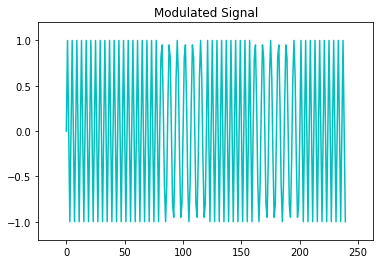

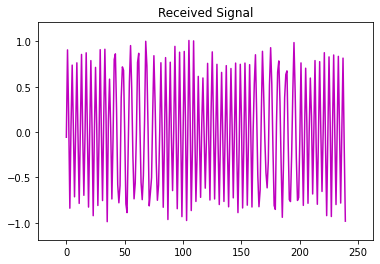

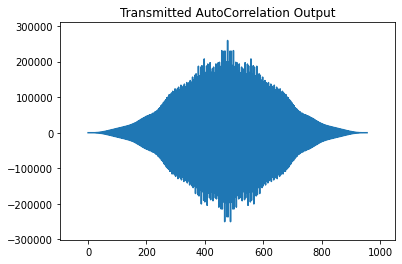

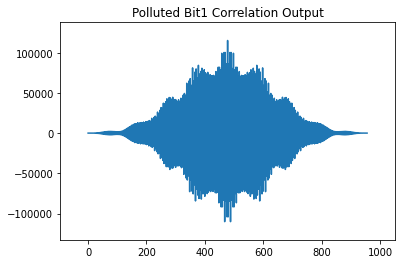

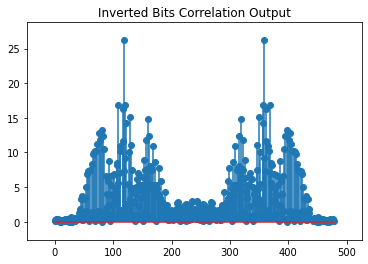

1718.7968151387427


In [ ]:
bits1 = np.array([1,0,1,1,0,1])

tx = fsk(bitseq = bits, spb = 40, f0 = 6615, f1 = 11025, fs = 44100)

rx1 = pollute(bitseq=bits1, len=0, spb = 40, f0 = 6615, f1 = 11025, fs = 44100, gain = 0.8, timeshift = 0, noise_stddev = 0.1)

rrr1 = np.correlate(rx1, rx1, mode = "full")

setup_plot("Transmitted AutoCorrelation Output")
plt.plot(np.correlate(rtt,rtt, mode = "full"))
plt.show()

setup_plot("Polluted Bit1 Correlation Output")
plt.plot(np.correlate(rrr1,rrr1, mode = "full"))
plt.show()


a = np.abs(rrr1[0:239])
b = np.abs(rrr1[240:480])



diff = np.abs(np.abs(rtt/1.5)-np.abs(rrr1))

setup_plot("Inverted Bits Correlation Output")
plt.stem(diff, use_line_collection = True)
plt.show()

print(np.sum(diff))

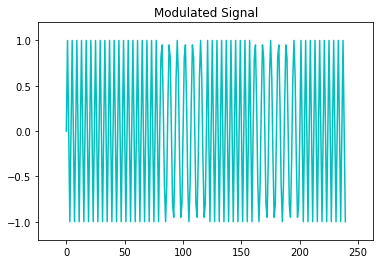

In [ ]:
bits  = np.array([1,1,0,1,0,1])
tx = fsk(bitseq = bits, spb = 40, f0 = 6615, f1 = 11025, fs = 44100)


